In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

In [7]:
df=pd.read_csv("C:\\Users\\Admin\\Downloads\\Salary_Data.csv")
salary.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [9]:
df.shape

(30, 2)

In [10]:
df.dtypes

YearsExperience    float64
Salary             float64
dtype: object

In [11]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

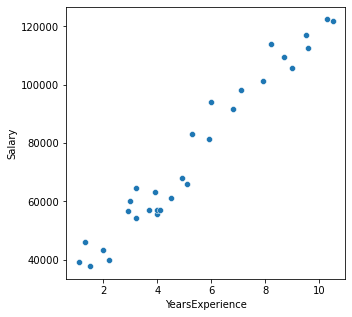

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
sns.scatterplot(x='YearsExperience', y='Salary', data=df,palette='set1')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

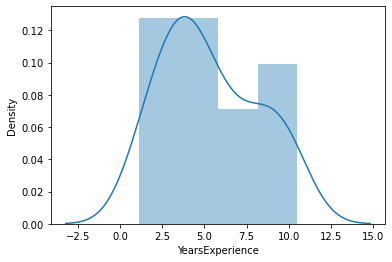

In [20]:
import seaborn as sns
sns.distplot(df['YearsExperience'])

<AxesSubplot:xlabel='Salary', ylabel='Density'>

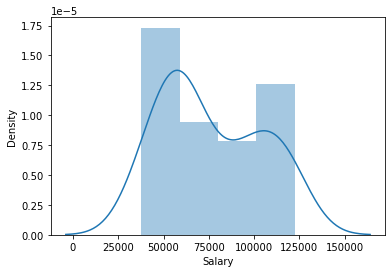

In [21]:
import seaborn as sns
sns.distplot(df['Salary'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d59cfd7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d59cfdf10>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d59cfd460>],
 'medians': [<matplotlib.lines.Line2D at 0x16d59d0a670>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d59d0aa00>],
 'means': []}

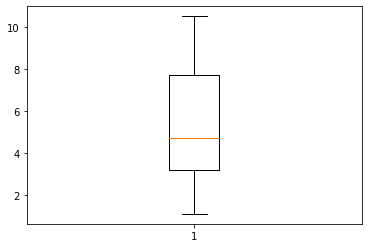

In [22]:
plt.boxplot(df['YearsExperience'])

{'whiskers': [<matplotlib.lines.Line2D at 0x16d59d5dbb0>,
 'caps': [<matplotlib.lines.Line2D at 0x16d59d6c310>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d59d5d820>],
 'medians': [<matplotlib.lines.Line2D at 0x16d59d6ca30>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d59d6cdc0>],
 'means': []}

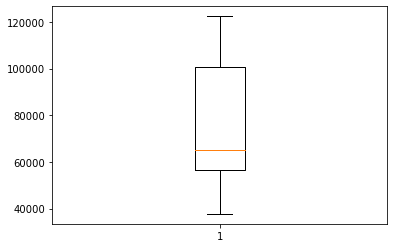

In [23]:
plt.boxplot(df['Salary'])

In [25]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [27]:
data1=df.copy()
data1.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [28]:
import statsmodels.formula.api as smf

In [29]:
model=smf.ols("Salary~YearsExperience", data=df).fit()

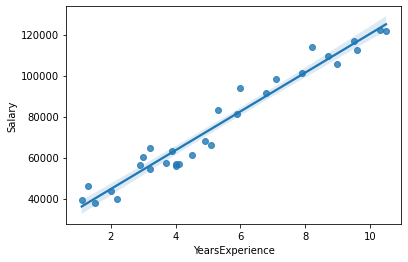

In [30]:
sns.regplot(x='YearsExperience',y='Salary', data=df);

In [31]:
model.params

Intercept          25792.200199
YearsExperience     9449.962321
dtype: float64

For every unit increase in the YearsEXperinece value, the value for Salary will increase by 25792.200199

In [32]:
model.fittedvalues

0      36187.158752
1      38077.151217
2      39967.143681
3      44692.124842
4      46582.117306
5      53197.090931
6      54142.087163
7      56032.079627
8      56032.079627
9      60757.060788
10     62647.053252
11     63592.049484
12     63592.049484
13     64537.045717
14     68317.030645
15     72097.015574
16     73987.008038
17     75877.000502
18     81546.977895
19     82491.974127
20     90051.943985
21     92886.932681
22    100446.902538
23    103281.891235
24    108006.872395
25    110841.861092
26    115566.842252
27    116511.838485
28    123126.812110
29    125016.804574
dtype: float64

In [33]:
df['Predicated Values']=model.fittedvalues
df

,YearsExperience,Salary,Predicated Values
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [25]:
model.resid

0      3155.841248
1      8127.848783
2     -2236.143681
3     -1167.124842
4     -6691.117306
5      3444.909069
6      6007.912837
7     -1587.079627
8      8412.920373
9     -3568.060788
10      570.946748
11    -7798.049484
12    -6635.049484
13    -7456.045717
14    -7206.030645
15    -4159.015574
16    -7958.008038
17     7210.999498
18     -183.977895
19    11448.025873
20     1686.056015
21     5386.067319
22      855.097462
23    10530.108765
24     1424.127605
25    -5259.861092
26     1402.157748
27    -3876.838485
28     -735.812110
29    -3144.804574
dtype: float64

In [26]:
model.pvalues

Intercept          5.511950e-12
YearsExperience    1.143068e-20
dtype: float64

Since p-value is less then 0.05 for 'YearsExperience ' variable, 
we can say that it is a significant variable in predicting the dependent variable 'Salary' '''

In [27]:
model.rsquared

0.9569566641435086

In [34]:
df['Error']=model.resid
salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [37]:
df['Error_sq']=(df['Error'])**2
df

,YearsExperience,Salary,Predicated Values,Error,Error_sq
0,1.1,39343.0,36187.158752,3155.841248,9.959334e+06
1,1.3,46205.0,38077.151217,8127.848783,6.606193e+07
2,1.5,37731.0,39967.143681,-2236.143681,5.000339e+06
3,2.0,43525.0,44692.124842,-1167.124842,1.362180e+06
4,2.2,39891.0,46582.117306,-6691.117306,4.477105e+07
5,2.9,56642.0,53197.090931,3444.909069,1.186740e+07
6,3.0,60150.0,54142.087163,6007.912837,3.609502e+07
7,3.2,54445.0,56032.079627,-1587.079627,2.518822e+06
8,3.2,64445.0,56032.079627,8412.920373,7.077723e+07
9,3.7,57189.0,60757.060788,-3568.060788,1.273106e+07


In [38]:
Mean_Squared_Error=df['Error_sq'].mean()
Mean_Squared_Error

31270951.722280964

In [39]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           1.14e-20
Time:                        22:53:39   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
import numpy as np

In [42]:
data_log=np.log(data1)
data_log.head()

,YearsExperience,Salary
0,0.095310,10.580073
1,0.262364,10.740843
2,0.405465,10.538237
3,0.693147,10.681091
4,0.788457,10.593906


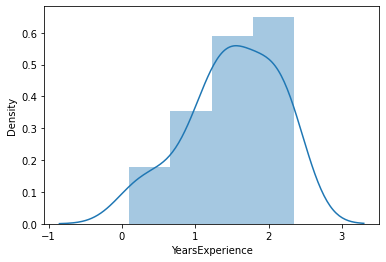

In [43]:
sns.distplot(data_log['YearsExperience']);

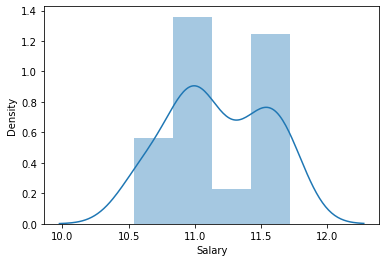

In [44]:
sns.distplot(data_log['Salary']);

In [45]:
data_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
data_log.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [47]:
data_log.dtypes

YearsExperience    float64
Salary             float64
dtype: object

{'whiskers': [<matplotlib.lines.Line2D at 0x16d5b957c40>,
 'caps': [<matplotlib.lines.Line2D at 0x16d5b96a3a0>,
 'boxes': [<matplotlib.lines.Line2D at 0x16d5b9578b0>],
 'medians': [<matplotlib.lines.Line2D at 0x16d5b96aac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x16d5b96ae50>],
 'means': []}

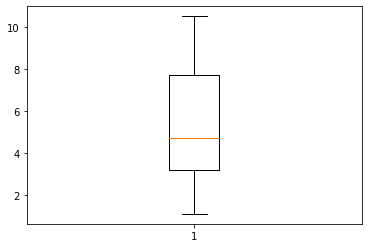

In [49]:
plt.boxplot(df['YearsExperience'])


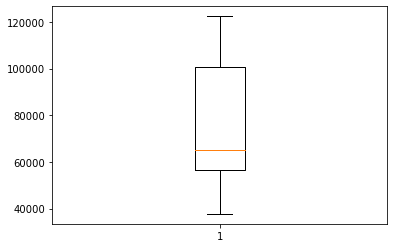

In [50]:
plt.boxplot(df['Salary']);

In [52]:
data_log.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.951428
Salary,0.951428,1.000000


In [53]:
model_2=smf.ols("Salary~YearsExperience", data=data_log).fit()

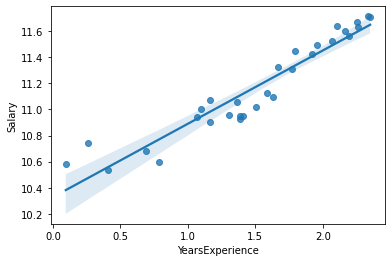

In [54]:
sns.regplot(x='YearsExperience',y='Salary', data=data_log);

In [55]:
model_2.pvalues

Intercept          9.073132e-45
YearsExperience    7.395278e-16
dtype: float64

In [56]:
model_2.params

Intercept          10.328043
YearsExperience     0.562089
dtype: float64

In [59]:
model_2.rsquared

0.9052150725817149

In [60]:
model_2.resid

0     0.198457
1     0.265328
2    -0.017713
3    -0.036563
4    -0.177320
5     0.018001
6     0.059036
7    -0.076891
8     0.091730
9    -0.109326
10   -0.038689
11   -0.177842
12   -0.157212
13   -0.168917
14   -0.153021
15   -0.094984
16   -0.145972
17    0.062213
18   -0.019048
19    0.115240
20    0.021168
21    0.065714
22    0.036058
23    0.131550
24    0.059027
25    0.004165
26    0.076195
27    0.032553
28    0.076061
29    0.061002
dtype: float64

In [61]:
model_2.fittedvalues

0     10.381616
1     10.475515
2     10.555951
3     10.717653
4     10.771226
5     10.926505
6     10.945561
7     10.981837
8     10.981837
9     11.063442
10    11.093033
11    11.107264
12    11.107264
13    11.121143
14    11.173468
15    11.221335
16    11.243821
17    11.265443
18    11.325724
19    11.335171
20    11.405524
21    11.429791
22    11.489804
23    11.510753
24    11.544023
25    11.563079
26    11.593469
27    11.599355
28    11.638915
29    11.649725
dtype: float64

In [62]:
data_log['Predicted values']=model_2.fittedvalues
data_log['Error']=model_2.resid
data_log

,YearsExperience,Salary,Predicted values,Error
0,0.095310,10.580073,10.381616,0.198457
1,0.262364,10.740843,10.475515,0.265328
2,0.405465,10.538237,10.555951,-0.017713
3,0.693147,10.681091,10.717653,-0.036563
4,0.788457,10.593906,10.771226,-0.177320
5,1.064711,10.944506,10.926505,0.018001
6,1.098612,11.004597,10.945561,0.059036
7,1.163151,10.904946,10.981837,-0.076891
8,1.163151,11.073567,10.981837,0.091730
9,1.308333,10.954117,11.063442,-0.109326


In [65]:
data_log['Error_sq']=data_log['Error']**2
data_log

,YearsExperience,Salary,Predicted values,Error,Error_sq
0,0.095310,10.580073,10.381616,0.198457,0.039385
1,0.262364,10.740843,10.475515,0.265328,0.070399
2,0.405465,10.538237,10.555951,-0.017713,0.000314
3,0.693147,10.681091,10.717653,-0.036563,0.001337
4,0.788457,10.593906,10.771226,-0.177320,0.031442
5,1.064711,10.944506,10.926505,0.018001,0.000324
6,1.098612,11.004597,10.945561,0.059036,0.003485
7,1.163151,10.904946,10.981837,-0.076891,0.005912
8,1.163151,11.073567,10.981837,0.091730,0.008414
9,1.308333,10.954117,11.063442,-0.109326,0.011952


In [67]:
Mean_Squared_Error=data_log['Error_sq'].mean()
Mean_Squared_Error

0.01246141392037965

In [68]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 13 Jun 2022   Prob (F-statistic):           7.40e-16
Time:                        23:11:50   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          10.3280      0.056    184.868      0.000      10.214      10.442
YearsExperience     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""